# Mnist Dataset

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets
import seaborn as sn

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [16]:
def plot_sample(X, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])

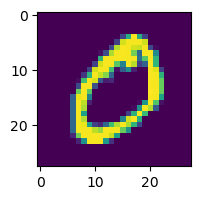

In [22]:
plot_sample(X_train, 1)

# Normalize Data

In [28]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# ANN Model

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix

In [109]:
ann = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(2000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(10, activation='softmax')
])

TypeError: missing a required argument: 'inputs'

In [41]:
ann.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [45]:
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9636 - loss: 0.1227
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9779 - loss: 0.0686
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9846 - loss: 0.0486
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9875 - loss: 0.0391
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9910 - loss: 0.0310


In [77]:
y_pred = ann.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [79]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.92      0.99      0.95      1010
           4       0.98      0.97      0.98       982
           5       0.99      0.90      0.95       892
           6       0.99      0.97      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.98      0.97      0.97     10000
weighted avg       0.98      0.97      0.97     10000



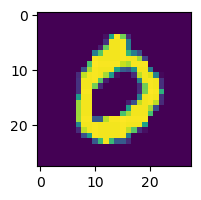

In [65]:
plot_sample(X_test, 3)

In [85]:
def pred_value(index):
    pred = ann.predict(X_test[index:index+1])
    print(np.argmax(pred))
    plot_sample(X_test, index)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
0


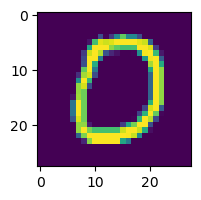

In [91]:
pred_value(10)

Text(95.72222222222221, 0.5, 'Truth')

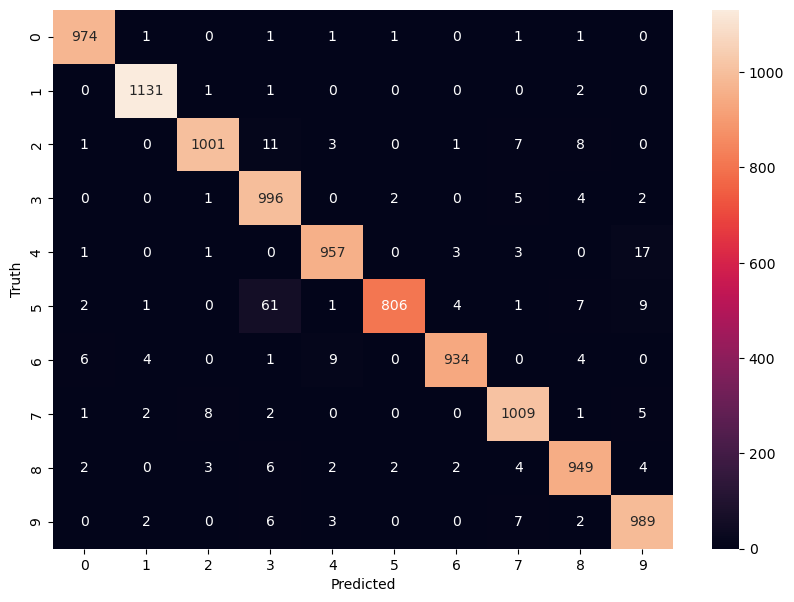

In [113]:
y_predicted_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')